In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn import metrics


%matplotlib inline

In [434]:
import warnings
warnings.filterwarnings("ignore")

In [435]:
# import cleaned comments data from csv
df = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/NLP_Project_4/datasets/comments_clean.csv')
df.head()

,body,target
0,removed,1
1,the name like rex not ash nickname little vide...,1
2,probably the demand insane,1
3,these image emanate 2006 2014 and 2020,1
4,not having all the crazed medium attention act...,1


In [436]:
import langdetect 
txt = df["body"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

removed   -->  sl


In [437]:
df.shape

(5477, 2)

In [438]:
df['target'].value_counts()

0    3772
1    1705
Name: target, dtype: int64

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    5477 non-null   object
 1   target  5477 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 85.7+ KB


In [440]:
# Sent & word tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize

In [441]:
df.head(10)

,body,target
0,removed,1
1,the name like rex not ash nickname little vide...,1
2,probably the demand insane,1
3,these image emanate 2006 2014 and 2020,1
4,not having all the crazed medium attention act...,1
5,lame,1
6,look like bought some hair,1
7,itt most people think take this shit,1
8,dude whoa feel out the loop when did the last ...,1
9,would say most like howard hughes robert house,1


#### Setting up X and y

In [442]:
X = df['body']
y = df['target']

y.value_counts(normalize=True)

0    0.688698
1    0.311302
Name: target, dtype: float64

In [443]:
df.head(1)

,body,target
0,removed,1


In [444]:
#df.drop(df.columns[2], axis=1, inplace=True)

In [445]:
df.head(1)

,body,target
0,removed,1


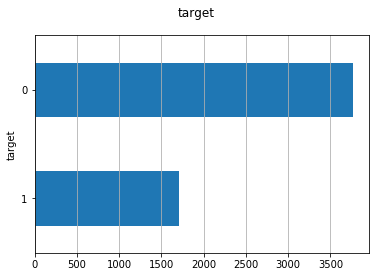

In [446]:
x = "target"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
df[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [447]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

In [448]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4107,), (1370,), (4107,), (1370,))

#### Edit Stop Words

In [449]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['did', 'doe', 'don', 'doesn', 'getting', 'going', 'got', 'ha', 'isn', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

#### Preprocessing

In [450]:
# ---->>> getting errors on my fit call in my Count Vectorizer so I am commenting this out but leaving in case 

In [451]:
# Instantiate a CountVectorizer with the default hyperparameters.
#cvec = CountVectorizer()

In [452]:
# Fit the vectorizer on our corpus.
#cvec.fit(X_train)

In [453]:
# Transform the corpus.
#X_train = cvec.transform(X_train)

In [454]:
# Convert X_train into a DataFrame.

#X_train_df = pd.DataFrame(X_train.toarray(),
                          #columns=cvec.get_feature_names())
#print(X_train_df.shape)
#X_train_df.head()

In [455]:
# Transform test

#X_test = cvec.transform(X_test)
#X_test_df = pd.DataFrame(X_test.toarray(),
                         #columns=cvec.get_feature_names())

#print(X_test_df.shape)
#X_test_df.head()

In [456]:
import nltk

In [541]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])
print("--- lemmatization ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

--- stemming ---
['r', 'e', 'm', 'o', 'v', 'e', 'd', ' ']
--- lemmatization ---
['r', 'e', 'm', 'o', 'v', 'e', 'd', ' ']


In [458]:
df['word_count'] = df["body"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["body"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["body"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_length'] = df['word_count'] / df['sentence_count']
df.head()

,body,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,removed,1,2,7,1,3.500000,2.0
1,the name like rex not ash nickname little vide...,1,38,179,1,4.710526,38.0
2,probably the demand insane,1,5,23,1,4.600000,5.0
3,these image emanate 2006 2014 and 2020,1,8,32,1,4.000000,8.0
4,not having all the crazed medium attention act...,1,11,60,1,5.454545,11.0


In [459]:
#df.drop(df.columns[6], axis=1, inplace=True)
#df.head(1)

Text(0.5, 1.0, 'Distribution of Average Word Length')

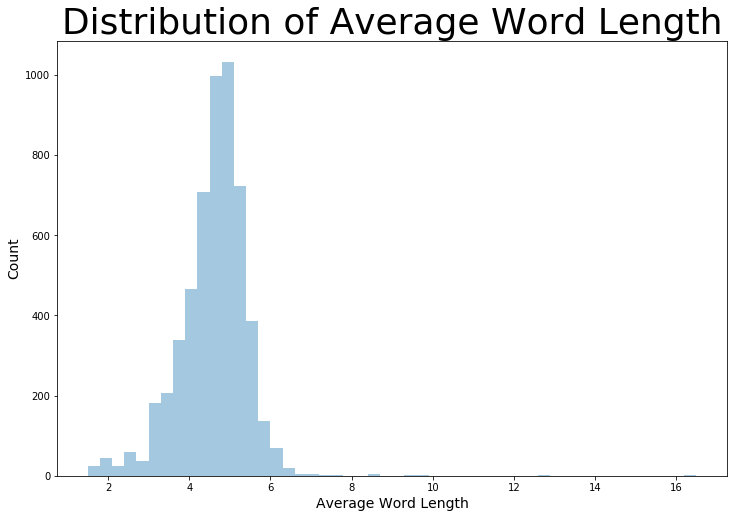

In [460]:
plt.figure(figsize = (12, 8))
sns.distplot(df.avg_word_length, kde=False)
plt.xlabel('Average Word Length', size=14)
plt.ylabel('Count', size=14);
plt.title('Distribution of Average Word Length', fontsize=36)

In [461]:
df["avg_word_length"].mean()

4.587028830431512

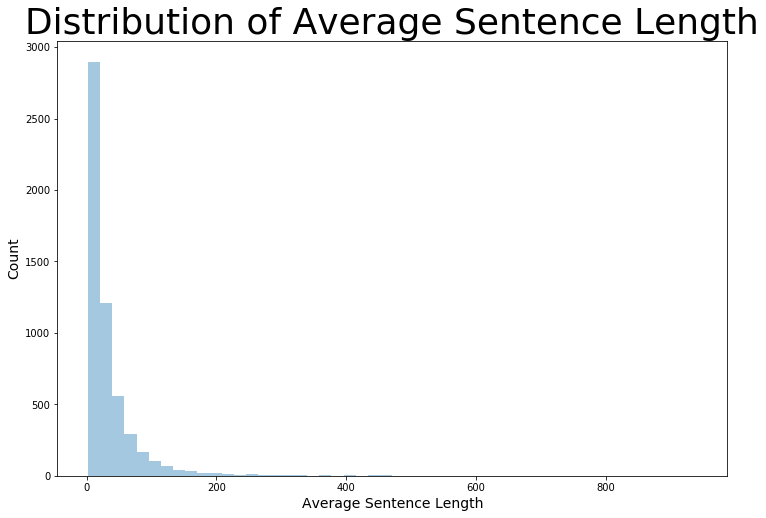

In [462]:
plt.figure(figsize = (12, 8))
sns.distplot(df.avg_sentence_length, kde=False)
plt.xlabel('Average Sentence Length', size=14)
plt.ylabel('Count', size=14);
plt.title('Distribution of Average Sentence Length', fontsize=36);

In [463]:
df["avg_sentence_length"].mean()

33.676465218185136

# Part 1: Logistic Regression 

#### Model 1 - Log Reg, standard stop words 

In [464]:
# using standard stop words = "english"
#incorporating a pipeline for tranforming

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)

lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [465]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print("There are {} features in the model.".format(len(cvec.get_feature_names())))
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

There are 10000 features in the model.
train score: 0.9581202824446068
test score: 0.7846715328467153


In [466]:
print(f'Logistic Regression Intercept: {lr.intercept_}')
print(f'Logistic Regression Coefficient: {lr.coef_}')

Logistic Regression Intercept: [0.00022423]
Logistic Regression Coefficient: [[ 0.18769812 -0.00772207 -0.00028316 ...  0.20491638 -0.1613094
  -0.16065708]]


In [467]:
# What is the accuracy of our baseline model?
y.value_counts(normalize=True)

0    0.688698
1    0.311302
Name: target, dtype: float64

In [468]:
print("The baseline accuracy for this model is {:.2f}%.".format(
    cross_val_score(lr, X_train, y_train).mean()*100))

The baseline accuracy for this model is nan%.


**FEATURE IMPORTANCE** 

In [469]:
lr_feat00 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_feat00.columns = ['coef_']
lr_feat00['abs_coef'] = np.abs(lr_feat00['coef_'])
lr_feat00.sort_values(by='abs_coef', ascending=False).head(30)

,coef_,abs_coef
elon,2.105573,2.105573
mar,1.936468,1.936468
article,-1.484852,1.484852
self,-1.454748,1.454748
meme,1.453297,1.453297
stock,1.388775,1.388775
rocket,1.331333,1.331333
power,-1.330616,1.330616
hour,1.330210,1.330210
literally,-1.325280,1.325280


#### Model 2 - Log Reg, custom stopwords 

In [470]:
# using additional stop words

cvec2 = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
lr2 = LogisticRegression()

pipe2 = Pipeline([
    ('cvec2', cvec2),
    ('lr2', lr2)
])

In [471]:
# baseline Logistic model # 2

pipe2.fit(X_train, y_train)
print("There are {} features in the model.".format(len(cvec2.get_feature_names())))
print('train score:', pipe2.score(X_train, y_train))
print('test score:', pipe2.score(X_test, y_test))

There are 10000 features in the model.
train score: 0.9556854151448746
test score: 0.7839416058394161


In [472]:
lr_feat02 = pd.DataFrame(data=lr2.coef_.T, index=cvec.get_feature_names())
lr_feat02.columns = ['coef_']
lr_feat02['abs_coef'] = np.abs(lr_feat02['coef_'])
lr_feat02.sort_values(by='abs_coef', ascending=False).head(30)

,coef_,abs_coef
elite,2.070460,2.070460
mansion,1.912937,1.912937
megastructures,1.483922,1.483922
article,-1.458497,1.458497
stockfish,1.429008,1.429008
selfdrivingcars,-1.423398,1.423398
powerdrift,-1.347417,1.347417
hormone,1.328163,1.328163
rocketjesus,1.325239,1.325239
nope,1.313137,1.313137


In [473]:
# What is the accuracy of our baseline model?
y.value_counts(normalize=True)

0    0.688698
1    0.311302
Name: target, dtype: float64

In [474]:
#print(f'Logistic Regression Intercept: {lr2.intercept_}')
#print(f'Logistic Regression Coefficient: {lr2.coef_}')

In [475]:
# Evaluate against the baseline.
round(y_test.value_counts(normalize=True)[0], 4)

0.6672

#### Model 3 - Log Reg, custom stopwords, n-grams

In [476]:
cvec3 = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )

lr3 = LogisticRegression()

pipe3 = Pipeline([
    ('cvec3', cvec3),
    ('lr3', lr3)
])

In [477]:
pipe3.fit(X_train, y_train)
print("There are {} features in the model.".format(len(cvec3.get_feature_names())))
print('train score:', pipe3.score(X_train, y_train))
print('test score:', pipe3.score(X_test, y_test))

There are 10000 features in the model.
train score: 0.9503287070854638
test score: 0.789051094890511


In [478]:
lr_feat03 = pd.DataFrame(data=lr.coef_.T, index=cvec3.get_feature_names())
lr_feat03.columns = ['coef_']
lr_feat03['abs_coef'] = np.abs(lr_feat03['coef_'])
lr_feat03.sort_values(by='abs_coef', ascending=False).head(50)

,coef_,abs_coef
foot ground,2.105573,2.105573
mainly,1.936468,1.936468
bus,-1.484852,1.484852
running,-1.454748,1.454748
med,1.453297,1.453297
spam,1.388775,1.388775
repeal,1.331333,1.331333
pissing,-1.330616,1.330616
hydrogen,1.330210,1.330210
let happen,-1.325280,1.325280


In [479]:
logreg_feat03 = pd.DataFrame(data=lr3.coef_.T, index=cvec3.get_feature_names())
logreg_feat03.columns = ['coef_']
logreg_feat03.sort_values(by='coef_', ascending=False).head(30)

,coef_
elon,2.368718
mar,2.030582
meme,1.472988
stock,1.448897
bot,1.262168
gif,1.246472
neuralink,1.242925
hour,1.212570
musk,1.198856
norway,1.192203


#### Model 4 - Log Reg using tf-idf, custom stop words, n-grams 

In [480]:
tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 3))

lr4 = LogisticRegression()

pipe4 = Pipeline([
    ('tf', tf),
    ('lr4', lr4)
])

pipe4.fit(X_train, y_train)
print("There are {} features in the model.".format(len(tf.get_feature_names())))
print('train score:', pipe4.score(X_train, y_train))
print('test score:', pipe4.score(X_test, y_test))

There are 10000 features in the model.
train score: 0.8463598733869004
test score: 0.7700729927007299


In [481]:
print(f'Logistic Regression Intercept: {lr4.intercept_}')
print(f'Logistic Regression Coefficient: {lr4.coef_}')

Logistic Regression Intercept: [-0.50562276]
Logistic Regression Coefficient: [[-0.25640487 -0.11148296 -0.0242847  ... -0.06054537 -0.06054537
   0.07144286]]


In [482]:
lr_tf_feat04 = pd.DataFrame(data=lr4.coef_.T, index=cvec.get_feature_names())
lr_tf_feat04.columns = ['coef_']
lr_tf_feat04['abs_coef'] = np.abs(lr_tf_feat04['coef_'])
lr_tf_feat04.sort_values(by='abs_coef', ascending=False).head(50)

,coef_,abs_coef
deaf,5.378897,5.378897
maximize,3.158363,3.158363
mmsi,2.558394,2.558394
promote,-2.405181,2.405181
superimpose,2.056270,2.056270
whore,-1.937604,1.937604
yellow,-1.913854,1.913854
cerpheus27,-1.911301,1.911301
delighted,-1.884095,1.884095
nature,1.775707,1.775707


In [483]:
lr_tf_feat04.sort_values(by='abs_coef', ascending=False).tail(30)

,coef_,abs_coef
longest,-0.001130,0.001130
contain,0.001122,0.001122
progressed,0.001108,0.001108
watching,0.001065,0.001065
particulate,-0.001062,0.001062
refuse,-0.001032,0.001032
obstacle,-0.000997,0.000997
recognise,-0.000997,0.000997
reclaim,-0.000997,0.000997
victim,-0.000997,0.000997


#### Model 5 - Log Reg, custom stop words, GridsearchCV

In [484]:
# initialize
cvec = CountVectorizer(stop_words = stop_words)

lr5 = LogisticRegression()

pipe5 = Pipeline([
    ('cvec', cvec),
    ('lr5', lr5)
])

In [485]:
# baseline Logistic model

pipe5.fit(X_train, y_train)
print("There are {} features in the model.".format(len(cvec.get_feature_names())))
print('train score:', pipe5.score(X_train, y_train))
print('test score:', pipe5.score(X_test, y_test))

There are 11223 features in the model.
train score: 0.9598246895544192
test score: 0.7817518248175183


In [486]:
print(f'Logistic Regression Intercept: {lr5.intercept_}')
print(f'Logistic Regression Coefficient: {lr5.coef_}')

Logistic Regression Intercept: [-0.031114]
Logistic Regression Coefficient: [[ 0.19954085 -0.00722808 -0.00065491 ... -0.15415459  0.35349915
   0.17640627]]


**GridSearchCV**

In [487]:
%%time

# gridsearchCV tests cross-validation for the parameters
# pipe

params = {
#     'cvec__stop_words': [stop_words], 
    'cvec__max_features': [5000, 10000, 20000], 
#     'cvec__ngram_range': [(1, 1), (1, 2)], 
    'lr__penalty': ['l1', 'l2'], 
    'lr__C': np.logspace(-10, 0, 10)
}
gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   21.6s finished


CPU times: user 35.9 s, sys: 355 ms, total: 36.3 s
Wall time: 25.3 s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=10000,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [488]:
cvec.get_params().keys()

dict_keys(['analyzer', 'binary', 'decode_error', 'dtype', 'encoding', 'input', 'lowercase', 'max_df', 'max_features', 'min_df', 'ngram_range', 'preprocessor', 'stop_words', 'strip_accents', 'token_pattern', 'tokenizer', 'vocabulary'])

In [489]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.7772096420745069
gs.best_params_ {'cvec__max_features': 10000, 'lr__C': 1.0, 'lr__penalty': 'l2'}
gs.score(X_test, y_test) 0.7846715328467153


# Part 2: Random Forest

In [490]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [549]:
# train/test split
# stratify y just in case
# test_size : default = 0.25
# shuffle: default = True

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.15, random_state=42)

In [550]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((4655,), (822,), (4655,), (822,))

#### Model 6 - RF, standard stop words

In [551]:
cvec6 = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe6 = Pipeline([
    ('cve6', cvec6),
    ('rf', rf)
])

pipe6.fit(X_train2, y_train2)
print("There are {} features in the model.".format(len(cvec6.get_feature_names())))
print('train score:', pipe6.score(X_train2, y_train2))
print('test score:', pipe6.score(X_test2, y_test2))

There are 10000 features in the model.
train score: 0.9950590762620838
test score: 0.7749391727493917


#### Model 7 - RF, custom stop words 

In [552]:
# using additional stop words

cvec7 = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
rf2 = RandomForestClassifier(random_state = 42)

pipe7 = Pipeline([
    ('cvec7', cvec7),
    ('rf2', rf2)
])

pipe7.fit(X_train2, y_train2)
print("There are {} features in the model.".format(len(cvec7.get_feature_names())))
print('train score:', pipe7.score(X_train2, y_train2))
print('test score:', pipe7.score(X_test2, y_test2))

There are 10000 features in the model.
train score: 0.9952738990332975
test score: 0.7907542579075426


In [496]:
rf_feat = cvec7.get_feature_names()
rf_feat_import = rf.feature_importances_

df_rf_frame = pd.DataFrame(data=rf_feat_import, index=rf_feat)

In [497]:
df_rf_frame.sort_values(by=0, ascending=False).head(30)

,0
eloquent,0.036400
mark,0.008860
nailed,0.008719
period,0.005255
powder,0.005235
year,0.004411
good,0.004331
kanye,0.004191
neighborhood,0.004108
enforcing,0.004082


In [499]:
rf_feat = cvec7.get_feature_names()
rf_feat_imp = rf2.feature_importances_

df_rf_feat01 = pd.DataFrame(data=rf_feat_imp, index=rf_feat)

df_rf_feat01.columns = ['feature_importances_']

In [500]:
df_rf_feat01.sort_values(by='feature_importances_', ascending=False).head(30)

,feature_importances_
elon,0.031665
musk,0.009600
mar,0.009240
power,0.005880
year,0.005291
people,0.004987
need,0.004769
country,0.004327
energy,0.003972
water,0.003911


In [501]:
df_rf_feat01.sort_values(by='feature_importances_', ascending=False).tail(20)

,feature_importances_
revolves,0.0
revved,0.0
cased,0.0
cascade,0.0
rhetorical,0.0
rhythm,0.0
carved,0.0
cartoonish,0.0
richmond,0.0
ridge,0.0


#### Model 8 - RF, custom stop words, n-grams

In [553]:
# CountVectorizer & Random forest using additional stop words and 1 - 3 n-grams

tf = TfidfVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('tf', tf),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print("There are {} features in the model.".format(len(tf.get_feature_names())))
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

There are 10000 features in the model.
train score: 0.9922084246408571
test score: 0.7489051094890511


In [503]:
rf_feat = cvec.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat02 = pd.DataFrame(data=rf_feat_imp, index=rf_feat)

df_rf_feat02.columns = ['feature_importances_']

In [504]:
df_rf_feat02.sort_values(by='feature_importances_', ascending=False).head(50)

,feature_importances_
elon,0.031368
mar,0.010007
musk,0.008902
power,0.006244
year,0.005263
people,0.005102
country,0.004461
energy,0.004336
need,0.003939
water,0.003923


#### Model 9 - RF, custom stop words, GridsearchCV

In [554]:
# initialize
cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

In [555]:
# baseline Random forest

pipe.fit(X_train2, y_train2)
print("There are {} features in the model.".format(len(cvec.get_feature_names())))
print('train score:', pipe.score(X_train2, y_train2))
print('test score:', pipe.score(X_test2, y_test2))

There are 10000 features in the model.
train score: 0.9952738990332975
test score: 0.7907542579075426


In [507]:
%%time

# gridsearchCV tests cross-validation for the parameters
# pipe

params = {
#     'cvec__stop_words': [None, 'english'], 
    'cvec__max_features': [5000, 10000, 20000], 
    'cvec__ngram_range': [(1, 1), (1, 2)], 
    'rf__n_estimators': [10, 20, 30],
    'rf__max_depth': [None, 10, 20]
}

gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  3.8min finished


CPU times: user 58.8 s, sys: 1.88 s, total: 1min
Wall time: 3min 52s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=10000,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [508]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.7560262965668372
gs.best_params_ {'cvec__max_features': 20000, 'cvec__ngram_range': (1, 2), 'rf__max_depth': None, 'rf__n_estimators': 30}
gs.score(X_test, y_test) 0.772992700729927


# Part 3: Naive Bayes

In [509]:
df.head(1)

,body,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,removed,1,2,7,1,3.5,2.0


In [510]:
# Split data into X and y
X = df.body
y = df.target

In [511]:
df.head(10)

,body,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,removed,1,2,7,1,3.500000,2.0
1,the name like rex not ash nickname little vide...,1,38,179,1,4.710526,38.0
2,probably the demand insane,1,5,23,1,4.600000,5.0
3,these image emanate 2006 2014 and 2020,1,8,32,1,4.000000,8.0
4,not having all the crazed medium attention act...,1,11,60,1,5.454545,11.0
5,lame,1,2,4,1,2.000000,2.0
6,look like bought some hair,1,6,22,1,3.666667,6.0
7,itt most people think take this shit,1,8,30,1,3.750000,8.0
8,dude whoa feel out the loop when did the last ...,1,18,72,1,4.000000,18.0
9,would say most like howard hughes robert house,1,9,39,1,4.333333,9.0


In [512]:
# train/test split
# stratify y just in case
# test_size : default = 0.25
# shuffle: default = True

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

#### Model 10 - Bayes, MultinomialNB classifier, custom stop words, GridSearchCV

**baseline**

In [513]:
# set up pipeline, using mnb

# initialize
cvec = CountVectorizer(stop_words = stop_words)
mnb = MultinomialNB()

pipe10 = Pipeline([
    ('cvec', cvec),
    ('mnb', mnb)
])

In [514]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score


mnb_model = make_pipeline(
    CountVectorizer(stop_words='english'),
    MultinomialNB()
)
cv_scores = cross_val_score(mnb_model, X_train, y_train, cv=5, scoring='roc_auc')
mnb_model.fit(X_train, y_train)
y_pred = mnb_model.predict(X_test)
print('Multinomial naive Bayes classifier')
print('Train score: {}, Test score {}'.format(round(cv_scores.mean(), 4), round(roc_auc_score(y_test, y_pred), 4)))
print('Number of features: {}'.format(len(mnb_model.named_steps.countvectorizer.get_feature_names())))

Multinomial naive Bayes classifier
Train score: 0.8654, Test score 0.7175
Number of features: 11324


In [515]:
#code help from https://www.programcreek.com/python/example/85919/sklearn.naive_bayes.MultinomialNB

# Fit and predict a multinomial naive Bayes classifier (suits with discrete features)
from sklearn.naive_bayes import MultinomialNB

mnb_model = make_pipeline(
    CountVectorizer(stop_words='english'),
    MultinomialNB()
)
cv_scores = cross_val_score(mnb_model, X_train, y_train, cv=5, scoring='roc_auc')
mnb_model.fit(X_train, y_train)
y_pred = mnb_model.predict(X_test)
print('Multinomial naive Bayes classifier')
print('Train score: {}, Test score {}'.format(round(cv_scores.mean(), 4), round(roc_auc_score(y_test, y_pred), 4)))
print('Number of features: {}'.format(len(mnb_model.named_steps.countvectorizer.get_feature_names())))

Multinomial naive Bayes classifier
Train score: 0.8654, Test score 0.7175
Number of features: 11324


In [516]:
#code help from https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/
# Explore parameters for vectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('tfidf', None),
    ('mnb', MultinomialNB())
])

params = dict(
    cvec__stop_words = [None, 'english'],
    cvec__max_df = (0.5, 0.75, 1.0),
    cvec__ngram_range = [(1, 1), (2, 2)],
    tfidf = [None, TfidfTransformer(use_idf=True), TfidfTransformer(use_idf=False)]
)

gs = GridSearchCV(pipe, params, cv=5, scoring='roc_auc', iid=False, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
print("Best params: {}".format(gs.best_params_))
print('Train score: {}, Test score {}'.format(round(gs.best_score_, 4), round(gs.best_estimator_.score(X_test, y_test), 4)))
print('Number of features: {}'.format(len(gs.best_estimator_.named_steps.cvec.get_feature_names())))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.7min


Best params: {'cvec__max_df': 0.5, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'tfidf': None}
Train score: 0.8654, Test score 0.7993
Number of features: 11586


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  7.9min finished


In [517]:
#code help from https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/
# Tune hyperparameter for multinomial naive Bayes
params = dict(
    cvec__stop_words = ['english'],
    tfidf = [TfidfTransformer(use_idf=True)],
    mnb__alpha = np.linspace(0.1, 1.0, 20)
)

gs = GridSearchCV(pipe, params, cv=5, scoring='roc_auc', iid=False, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
print("Best params: {}".format(gs.best_params_))
print('Train score: {}, Test score {}'.format(round(gs.best_score_, 4), round(gs.best_estimator_.score(X_test, y_test), 4)))
print('Number of features: {}'.format(len(gs.best_estimator_.named_steps.cvec.get_feature_names())))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.0s finished


Best params: {'cvec__stop_words': 'english', 'mnb__alpha': 0.24210526315789474, 'tfidf': TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)}
Train score: 0.8664, Test score 0.7927
Number of features: 11324


In [558]:
# Generate a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = mnb_model.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=['predict /r/elonmusk', 'predict /r/Futurology'],
            index=['actual /r/elonmusk', 'actual /r/Futurology'])

,predict /r/elonmusk,predict /r/Futurology
actual /r/elonmusk,876,68
actual /r/Futurology,210,216


In [559]:
#code help from https://scikit-learn.org/stable/modules/model_evaluation.html
# Examine some classification metrics 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Recall: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.7971
Misclassification rate: 0.2029
Precision: 0.7606
Recall: 0.507
Specificity: 0.928


- Our model correctly predicts 79.71% of observations.
- Among posts that our model predicted to be in /r/Futurology, we have 76.06% of them correctly classified.
- Among posts that are in /r/Futurology, our model has 51% of them correctly classified.
- Among posts that are in /r/elonmusk, our model has 92.8% of them correctly classified.

In [540]:
#Average the y_test_hat vectors to see if we can improve the score
#y_test_hat_agg = sum(df.loc['y_test_hat',:])
#y_test_hat = np.round(y_test_hat_agg/df.shape[1])
#print("The accuracy score of the average test solutions is {:.2f}%.".format(accuracy_score(y_test,y_test_hat)*100))

In [ ]:
# Examine incorrectly classified posts
df_pred = pd.DataFrame({
    'X_test': X_test,
    'y_test': y_test,
    'y_pred': y_pred
})

# Posts incorrectly predicted to be in /r/relationship_advice
for i in df_pred[(df_pred.y_test - df_pred.y_pred) > 0]['X_test']:
    print(i)
    print('-'*20)

#### Model 11 - Bayes, BernoulliNB classifier, custom stop words, GridSearchCV

In [523]:
from sklearn.naive_bayes import BernoulliNB

In [524]:
# set up pipeline, using mnb

# initialize
cvec = CountVectorizer(stop_words = stop_words)
bnb = BernoulliNB(alpha=1.0, binarize=0.0)

pipe11 = Pipeline([
    ('cvec', cvec),
    ('bnb', bnb)
])

In [525]:
# baseline BernoulliNB model

pipe11.fit(X_train3, y_train3)
print("There are {} features in the model.".format(len(cvec.get_feature_names())))
print('train score:', pipe11.score(X_train3, y_train3))
print('test score:', pipe11.score(X_test3, y_test3))

There are 11391 features in the model.
train score: 1.0
test score: 1.0


In [526]:
bnb.get_params().keys()

dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior'])

In [527]:
%%time

# gridsearchCV tests cross-validation for the parameters

params = {
#     'cvec__stop_words': [None, 'english'], 
#     'cvec__max_features': [5000, 10000, 20000], 
#     'cvec__ngram_range': [(1, 1), (1, 2)]
    'cvec__max_features': [10000], 
    'cvec__ngram_range': [(1, 1)], 
    'bnb__alpha': [0, 0.25, 0.5, 0.75, 1]
    # min_df
    # max_df
    #binarizer__threshold': np.logspace(0, 5, 20) #use for BernoulliNB
}
gs2 = GridSearchCV(pipe11, param_grid=params, cv=3, verbose=1)
gs2.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 1.97 s, sys: 30.7 ms, total: 2 s
Wall time: 2.34 s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [557]:
#code help from https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019
#Tuning model

bnb_model = make_pipeline(
    CountVectorizer(stop_words='english'),
    BernoulliNB()
)
cv_scores = cross_val_score(bnb_model, X_train, y_train, cv=5, scoring='roc_auc')
bnb_model.fit(X_train, y_train)
y_pred = bnb_model.predict(X_test)
print('Bernoulli naive Bayes classifier')
print('Train score: {}, Test score {}'.format(round(cv_scores.mean(), 4), round(roc_auc_score(y_test, y_pred), 4)))
print('Number of features: {}'.format(len(bnb_model.named_steps.countvectorizer.get_feature_names())))

Bernoulli naive Bayes classifier
Train score: 0.8541, Test score 0.768
Number of features: 11324


In [528]:
print('gs2.best_score_', gs2.best_score_)
print('gs2.best_params_', gs2.best_params_)
print('gs2.score(X_test, y_test)', gs2.score(X_test, y_test))

gs2.best_score_ 0.7888970051132214
gs2.best_params_ {'bnb__alpha': 1, 'cvec__max_features': 10000, 'cvec__ngram_range': (1, 1)}
gs2.score(X_test, y_test) 0.7394160583941606


In [529]:
bnb.feature_log_prob_

array([[-4.79457444, -7.62778779, -7.62778779, ..., -7.22232268,
        -7.62778779, -7.62778779],
       [-0.69314718, -0.69314718, -0.69314718, ..., -0.69314718,
        -0.69314718, -0.69314718]])

# Part 4: Function to run gridsearch on anything we want 

In [530]:
#code help from https://hpc-carpentry.github.io/hpc-python/05-functions/
#code help from https://medium.com/@kadirmalak/how-to-pipe-chain-functions-in-python-137c36150c1
#code help from https://medium.com/@ManningBooks/function-pipelines-for-mapping-complex-transformations-66b09bf29c68
#https://medium.com/@yanhann10/a-brief-view-of-machine-learning-pipeline-in-python-5f50b941fca8

def create_pipline(items, use_params, X_train, X_test, y_train, y_test):

    # Add a pipe, add a param !
    pipe_items = {
        'cv': CountVectorizer(),
        'tv': TfidfVectorizer(),
        'hv': HashingVectorizer(),

        'ss' : StandardScaler(),
        'pf' : PolynomialFeatures(),

        'lr' : LogisticRegression(),
        'bnb' : BernoulliNB(),
        'mnb' : MultinomialNB(),
        'rf' : RandomForestClassifier(),
        'gb' : GradientBoostingClassifier(),
        'ab' : AdaBoostClassifier(),
        'svc' : SVC(),
        'knn' : KNeighborsClassifier()
    }

    # Include at least one param for each pipe item
    param_items = {
        'cv' : {
            'cv__stop_words' : [None, 'english'],
            'cv__ngram_range' : [(1,1), (1,2)],
            'cv__max_df' : [1.0, 0.95],
            'cv__min_df' : [1],
            'cv__max_features' : [2000, 2250, 2500, 2750]
        },
        'tv' : {
            'tv__stop_words' : [None, 'english'],
            'tv__ngram_range' : [(1,1), (1,2)],
            'tv__max_df' : [1.0, 0.95],
            'tv__min_df' : [1, 2],
            'tv__max_features' : [2000, 2250, 2500, 2750]
        },
        'hv' : {
            'hv__stop_words' : [None, 'english'],
            'hv__ngram_range' : [(1,1), (1,2)]
        },
        'ss' : {
            'ss__with_mean' : [False]
        },
        'pf' : {
            'pf__degree' : [2]
        },
        'lr' : {
            'lr__C' : [1, .05],
            'lr__penalty' : ['l2']
        },
        'bnb' : {
            'bnb__alpha' : [1.0, 1.5, 1.8, 2.0]
        },
        'mnb' : {
            'mnb__alpha' : [0.8, 1.0, 1.2]
        },
        'rf' : {
            'rf__n_estimators' : [8, 10, 15]
        },
        'gb' : {
            'gb__n_estimators' : [80, 100, 120]
        },
        'ab' : {
            'ab__n_estimators' : [75, 50, 125]
        },
        'svc' : {
            'svc__kernel' : ['linear','poly']
        },
        'knn' : {
            'knn__n_neighbors' : [25,35,45]
        }
    }

    # Create the parameters for GridSearch
    params = dict()
    if use_params:
        for i in items:
            for p in param_items[i]:
                params[p] = param_items[i][p]

    # Create the pipeline
    pipe_list = [(i,pipe_items[i]) for i in items]
    print("Using:")
    for p in pipe_list:
        print("\t" + str(p[1]).split('(')[0])
    pipe = Pipeline(pipe_list)

    # Grid search
    gs = GridSearchCV(pipe, param_grid=params, verbose=1)
    gs.fit(X_train, y_train)

    # Print the results
    train_params = gs.best_params_
    train_score = gs.best_score_
    y_test_hat = gs.predict(X_test)
    test_score = gs.score(X_test, y_test)

    for k in train_params:
        print("{}: {}".format(k,train_params[k]))

    print("Train score: {} Test score {}".format(train_score, test_score))
    print("")

    return train_score, test_score, y_test_hat, train_params

In [531]:
from itertools import combinations
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [532]:
#code help from https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
#Decide what to put into the pipline, grid searh, and save the "best" for each grid search
use_params = True
vects = ['cvec, cvec2, cvec3, cvec5, cvec6, cvec7, tf']
models = ['lr','bnb', 'mnb','rf']
other = ['pf','ss']

# After some initial tests, these seem like the best to pursue further
vects = ['cv','tv']
models = ['lr','bnb', 'mnb']
other = []

model_solns = {}
idx = 0
for v in vects:
    for i in range(len(other)+1):
        for o in list(combinations(other, i)):
            for m in models:
                idx += 1
                pipe_items = [v]
                pipe_items.extend(list(o))
                pipe_items.append(m)
                [train_score, test_score, y_test_hat, best_params] = create_pipline(pipe_items, use_params,
                                                                        X_train, X_test,
                                                                        y_train, y_test)
                model_solns[idx] = {'vectorizer' : v, 'model': m, 'features': list(o),
                                    'train_score': train_score, 'test_score': test_score,
                                    'best_params': best_params, 'y_test_hat' : y_test_hat}

Using:
	CountVectorizer
	LogisticRegression
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  1.5min finished


cv__max_df: 1.0
cv__max_features: 2750
cv__min_df: 1
cv__ngram_range: (1, 1)
cv__stop_words: None
lr__C: 1
lr__penalty: l2
Train score: 0.7857280451410806 Test score 0.7824817518248175

Using:
	CountVectorizer
	BernoulliNB
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


bnb__alpha: 2.0
cv__max_df: 1.0
cv__max_features: 2750
cv__min_df: 1
cv__ngram_range: (1, 1)
cv__stop_words: english
Train score: 0.6985641508930714 Test score 0.6744525547445256

Using:
	CountVectorizer
	MultinomialNB
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.9min finished


cv__max_df: 1.0
cv__max_features: 2750
cv__min_df: 1
cv__ngram_range: (1, 1)
cv__stop_words: None
mnb__alpha: 1.2
Train score: 0.7786703059292122 Test score 0.775912408759124

Using:
	TfidfVectorizer
	LogisticRegression
Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:  3.1min finished


lr__C: 1
lr__penalty: l2
tv__max_df: 1.0
tv__max_features: 2000
tv__min_df: 1
tv__ngram_range: (1, 1)
tv__stop_words: None
Train score: 0.7774481301362354 Test score 0.7875912408759124

Using:
	TfidfVectorizer
	BernoulliNB
Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:  8.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


bnb__alpha: 2.0
tv__max_df: 1.0
tv__max_features: 2750
tv__min_df: 2
tv__ngram_range: (1, 1)
tv__stop_words: english
Train score: 0.6985647436068411 Test score 0.6722627737226278

Using:
	TfidfVectorizer
	MultinomialNB
Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  3.7min finished


mnb__alpha: 0.8
tv__max_df: 1.0
tv__max_features: 2250
tv__min_df: 1
tv__ngram_range: (1, 2)
tv__stop_words: english
Train score: 0.7745290148208077 Test score 0.7766423357664234



In [533]:
#changing output options
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* 500px */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [534]:
best_df = pd.DataFrame(model_solns)
best_df.sort_values(ascending=False, by='test_score',axis=1)

,4,1,6,3,2,5
vectorizer,tv,cv,tv,cv,cv,tv
model,lr,lr,mnb,mnb,bnb,bnb
features,[],[],[],[],[],[]
train_score,0.777448,0.785728,0.774529,0.77867,0.698564,0.698565
test_score,0.787591,0.782482,0.776642,0.775912,0.674453,0.672263
best_params,"{'lr__C': 1, 'lr__penalty': 'l2', 'tv__max_df'...","{'cv__max_df': 1.0, 'cv__max_features': 2750, ...","{'mnb__alpha': 0.8, 'tv__max_df': 1.0, 'tv__ma...","{'cv__max_df': 1.0, 'cv__max_features': 2750, ...","{'bnb__alpha': 2.0, 'cv__max_df': 1.0, 'cv__ma...","{'bnb__alpha': 2.0, 'tv__max_df': 1.0, 'tv__ma..."
y_test_hat,"[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."


In [535]:
best_df.loc[['vectorizer','model','train_score','test_score','best_params'], :]

,1,2,3,4,5,6
vectorizer,cv,cv,cv,tv,tv,tv
model,lr,bnb,mnb,lr,bnb,mnb
train_score,0.785728,0.698564,0.77867,0.777448,0.698565,0.774529
test_score,0.782482,0.674453,0.775912,0.787591,0.672263,0.776642
best_params,"{'cv__max_df': 1.0, 'cv__max_features': 2750, ...","{'bnb__alpha': 2.0, 'cv__max_df': 1.0, 'cv__ma...","{'cv__max_df': 1.0, 'cv__max_features': 2750, ...","{'lr__C': 1, 'lr__penalty': 'l2', 'tv__max_df'...","{'bnb__alpha': 2.0, 'tv__max_df': 1.0, 'tv__ma...","{'mnb__alpha': 0.8, 'tv__max_df': 1.0, 'tv__ma..."


In [536]:
print(best_df.loc['best_params'][1])

{'cv__max_df': 1.0, 'cv__max_features': 2750, 'cv__min_df': 1, 'cv__ngram_range': (1, 1), 'cv__stop_words': None, 'lr__C': 1, 'lr__penalty': 'l2'}


In [537]:
from sklearn.metrics import accuracy_score

In [538]:
#code help from https://www.dataquest.io/blog/data-pipelines-tutorial/
# Average the y_test_hat vectors to see if we can improve the score
y_test_hat_agg = sum(best_df.loc['y_test_hat',:])
y_test_hat = np.round(y_test_hat_agg/best_df.shape[1])
print("The accuracy score of the average test solutions is {:.2f}%.".format(accuracy_score(y_test,y_test_hat)*100))

The accuracy score of the average test solutions is 78.83%.
